In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sb 

#Importing, merging and cleaning datasets

RAbaseline_with_insertions =  pd.read_csv("/localdisk/home/s1533486/VDJtools/VDJtools_patient_files/insertions.RAbaseline_data_with_muts_vdjtools.txt", sep='\t')
all_data_insertions= pd.read_csv("/localdisk/home/s1533486/VDJtools/VDJtools_patient_files/insertions_all_data.txt", sep='\t') 
frames = [RAbaseline_with_insertions,all_data_insertions]
full_dataset_n_insertions = pd.concat(frames)
full_dataset_n_insertions = full_dataset_n_insertions[full_dataset_n_insertions['Mutations'] != 'Mutations']
full_dataset_n_insertions['base.insertsize'] = full_dataset_n_insertions['base.insertsize'].astype(int)
full_dataset_n_insertions['base.vdins'] = full_dataset_n_insertions['base.vdins'].astype(int)
full_dataset_n_insertions['base.djins'] = full_dataset_n_insertions['base.djins'].astype(int)
full_dataset_n_insertions['Mutations'] = full_dataset_n_insertions['Mutations'].astype(int)
full_dataset_n_insertions['base.cdr3length'] = full_dataset_n_insertions['base.cdr3length'].astype(int)
full_dataset_n_insertions.loc[full_dataset_n_insertions['Mutations']  < 5, 'MUT_STATUS'] = 'Hypomutated'
full_dataset_n_insertions.loc[full_dataset_n_insertions['Mutations']  >= 5, 'MUT_STATUS'] = 'Hypermutated'

In [3]:
full_dataset_n_insertions['nadds'] = full_dataset_n_insertions['base.vdins'] + full_dataset_n_insertions['base.djins'] 
grouped_insertions = full_dataset_n_insertions.groupby(['Patient','Location','MUT_STATUS'])['nadds'].mean().reset_index(name='nadds')
grouped_insertions = grouped_insertions[grouped_insertions['Patient'] != 'FALSE']
grouped_insertions = grouped_insertions[grouped_insertions['Location'] != 'Synovium']

/opt/anaconda/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


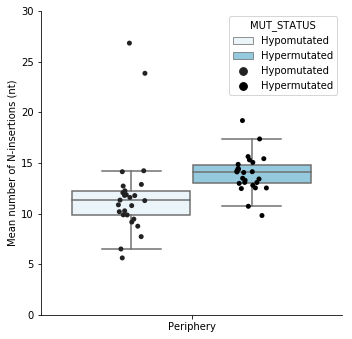

In [6]:
box = sb.catplot('Location','nadds',hue='MUT_STATUS',
                  data=grouped_insertions.loc[grouped_insertions['Location'] == 'Periphery'],
                  color = 'skyblue', kind = 'box', fliersize = 0, legend = False, hue_order=['Hypomutated','Hypermutated'])
dots = sb.stripplot('Location','nadds',hue='MUT_STATUS',
                  data=grouped_insertions.loc[grouped_insertions['Location'] == 'Periphery'],
                   color = 'black',
                    split = True, jitter = True, hue_order=['Hypomutated','Hypermutated'])
box.set(xlabel='', ylabel='Mean number of N-insertions (nt)', ylim = (0,30))
#plt.savefig('/localdisk/home/s1533486/Synovium_PBMCs/Figures/Fig5a_RA.pdf',dpi = 300)

/opt/anaconda/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


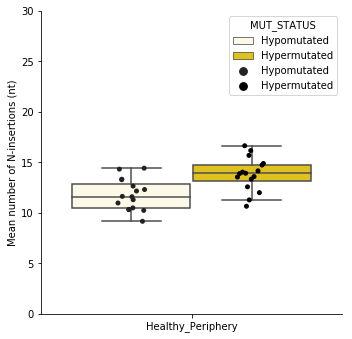

In [7]:
box = sb.catplot('Location','nadds',hue='MUT_STATUS',
                  data=grouped_insertions.loc[grouped_insertions['Location'] == 'Healthy_Periphery'],
                  color = 'gold', kind = 'box', fliersize = 0, legend = False, hue_order=['Hypomutated','Hypermutated'])
dots = sb.stripplot('Location','nadds',hue='MUT_STATUS',
                  data=grouped_insertions.loc[grouped_insertions['Location'] == 'Healthy_Periphery'],
                   color = 'black',
                    split = True, jitter = True, hue_order=['Hypomutated','Hypermutated'])
box.set(xlabel='', ylabel='Mean number of N-insertions (nt)', ylim = (0,30))
#plt.savefig('/localdisk/home/s1533486/Synovium_PBMCs/Figures/Fig5a_HD.pdf',dpi = 300)

In [8]:
#RA hypo
medi = grouped_insertions.loc[(grouped_insertions['Location'] == 'Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypomutated')
                                     , 'nadds'].median()
iqr = grouped_insertions.loc[(grouped_insertions['Location'] == 'Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypomutated')
                                     , 'nadds'].quantile([0.25,0.75])
print('RA hypo',medi ,',', iqr)

#RA hyper
medi = grouped_insertions.loc[(grouped_insertions['Location'] == 'Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypermutated')
                                     , 'nadds'].median()
iqr = grouped_insertions.loc[(grouped_insertions['Location'] == 'Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypermutated')
                                     , 'nadds'].quantile([0.25,0.75])
print('RA hyper',medi ,',', iqr)

#HD hypo
medi = grouped_insertions.loc[(grouped_insertions['Location'] == 'Healthy_Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypomutated')
                                     , 'nadds'].median()
iqr = grouped_insertions.loc[(grouped_insertions['Location'] == 'Healthy_Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypomutated')
                                     , 'nadds'].quantile([0.25,0.75])
print('HD hypo',medi ,',', iqr)

#HD hyper
medi = grouped_insertions.loc[(grouped_insertions['Location'] == 'Healthy_Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypermutated')
                                     , 'nadds'].median()
iqr = grouped_insertions.loc[(grouped_insertions['Location'] == 'Healthy_Periphery')
                                     &
                                     (grouped_insertions['MUT_STATUS'] == 'Hypermutated')
                                     , 'nadds'].quantile([0.25,0.75])
print('HD hyper',medi ,',', iqr)

RA hypo 11.297980086043935 , 0.25     9.858508
0.75    12.194383
Name: nadds, dtype: float64
RA hyper 14.0772779230279 , 0.25    12.992556
0.75    14.751664
Name: nadds, dtype: float64
HD hypo 11.619207088776104 , 0.25    10.456213
0.75    12.814888
Name: nadds, dtype: float64
HD hyper 13.908119086049204 , 0.25    13.154134
0.75    14.779276
Name: nadds, dtype: float64
